# Project 2: Corn production over time vs. infant mortality in Ireland

# *It's Corn!*

Data sources: 

https://data.ers.usda.gov/FEED-GRAINS-custom-query.aspx#ResultsPanel - Annual corn production in the USA, all years, unit = million bushels

https://www.mortality.org/Country/Country?cntr=IRL - Ireland, Deaths (period 1x1)

*Side note: I think it's hilarious that the USA has corn data that goes back to 1866. Unfortunately I had a hard time finding other data that went back that far*

In [3]:
import pandas as pd


In [ ]:
import plotly.io as pio

pio.renderers.default = "vscode+jupyterlab+notebook_connected"

In [146]:
corn = pd.read_csv('corn.csv', skiprows = 1)

#Initial data is already formatted as a table
corn

,Year,Frequency,Attribute,Commodity,Geography,Unit,Amount
0,1866,Commodity Market Year,Production,Corn,United States,Million bushels,730.814
1,1867,Commodity Market Year,Production,Corn,United States,Million bushels,793.905
2,1868,Commodity Market Year,Production,Corn,United States,Million bushels,919.590
3,1869,Commodity Market Year,Production,Corn,United States,Million bushels,782.084
4,1870,Commodity Market Year,Production,Corn,United States,Million bushels,1124.775
...,...,...,...,...,...,...,...
154,2020,Commodity Market Year,Production,Corn,United States,Million bushels,14086.699
155,2021,Commodity Market Year,Production,Corn,United States,Million bushels,15017.788
156,2022,Commodity Market Year,Production,Corn,United States,Million bushels,13650.531
157,2023,Commodity Market Year,Production,Corn,United States,Million bushels,15340.520


For our analysis, we will drop all columns and rename the amount column to reflect the unit of measurement
Also, the index will be set to the years column

In [148]:
#Dropping extraneous cols
corn = corn.drop(columns = ['Frequency', 'Attribute', 'Commodity', 'Geography', 'Unit'])
corn

,Year,Amount
0,1866,730.814
1,1867,793.905
2,1868,919.590
3,1869,782.084
4,1870,1124.775
...,...,...
154,2020,14086.699
155,2021,15017.788
156,2022,13650.531
157,2023,15340.520


In [150]:
# Renaming col & changing index to year
corn.rename(columns={"Amount": "Mil_Bushels_Corn"}, inplace = True)
corn.set_index('Year', inplace = True)

In [152]:
#Ready to be merged with the other dataframe
corn.head()

,Mil_Bushels_Corn
Year,
1866,730.814
1867,793.905
1868,919.590
1869,782.084
1870,1124.775


Moving onto infant mortality data.

This data needs to be reformatted into multiple columns and aggregated at the year level
in order to get mortality rates for 0-2 year olds

In [210]:
mort_rates = pd.read_csv('Death_rates.txt', delimiter = '\t', skiprows=2)

#Data is all in one column
mort_rates.head()

,Year Age Female Male Total
0,1950 0 0.040251 ...
1,1950 1 0.003314 ...
2,1950 2 0.001979 ...
3,1950 3 0.001732 ...
4,1950 4 0.001627 ...


In [212]:
#Inspecting column header to get the name
mort_rates.columns

Index(['  Year          Age             Female            Male           Total'], dtype='object')

In [214]:
#Using regex to account for varying spacing and convert to df
split = mort_rates['  Year          Age             Female            Male           Total'].str.split(r'\s+', expand=True)

split.head()

,0,1,2,3,4,5
0,,1950,0,0.040251,0.051421,0.045980
1,,1950,1,0.003314,0.004448,0.003894
2,,1950,2,0.001979,0.002293,0.002140
3,,1950,3,0.001732,0.001868,0.001802
4,,1950,4,0.001627,0.001454,0.001539


In [216]:
#First column is blank, needs to be dropped
split.columns = ['blank','year','age','female','male','total']
split = split.drop(columns = ['blank'])

#Note: missing values are coded as '.'
#this may or may not need to be replaced with NaN later
split

,year,age,female,male,total
0,1950,0,0.040251,0.051421,0.045980
1,1950,1,0.003314,0.004448,0.003894
2,1950,2,0.001979,0.002293,0.002140
3,1950,3,0.001732,0.001868,0.001802
4,1950,4,0.001627,0.001454,0.001539
...,...,...,...,...,...
7876,2020,106,0.878170,6.000000,0.951639
7877,2020,107,1.349068,.,1.349068
7878,2020,108,2.670000,.,2.670000
7879,2020,109,6.000000,.,6.000000


In [218]:
#Note: variables are all strings
split.dtypes

year      object
age       object
female    object
male      object
total     object
dtype: object

For the purposes of this analysis we will consider an infant to be 0-2 years old

We will average across this age range for each year to then be used for the data visualization

In [221]:
infants = ['0','1','2']

infant_mort = split[split['age'].isin(infants)]
infant_mort

,year,age,female,male,total
0,1950,0,0.040251,0.051421,0.045980
1,1950,1,0.003314,0.004448,0.003894
2,1950,2,0.001979,0.002293,0.002140
111,1951,0,0.039399,0.052531,0.046131
112,1951,1,0.004722,0.004913,0.004820
...,...,...,...,...,...
7660,2019,1,0.000164,0.000317,0.000242
7661,2019,2,0.000097,0.000093,0.000095
7770,2020,0,0.002921,0.002784,0.002851
7771,2020,1,0.000169,0.000129,0.000149


In [223]:
#Only have float values now (as strings)
infant_mort['female'].unique()

array(['0.040251', '0.003314', '0.001979', '0.039399', '0.004722',
       '0.002270', '0.038864', '0.003552', '0.002147', '0.035011',
       '0.003611', '0.001930', '0.032741', '0.003282', '0.001704',
       '0.032708', '0.002435', '0.001535', '0.031327', '0.003126',
       '0.001139', '0.029340', '0.002014', '0.001348', '0.030330',
       '0.001871', '0.001253', '0.028163', '0.001768', '0.000970',
       '0.024962', '0.001827', '0.001380', '0.026952', '0.001943',
       '0.001541', '0.025888', '0.001815', '0.023349', '0.001590',
       '0.000636', '0.024565', '0.001554', '0.001072', '0.021975',
       '0.001585', '0.001112', '0.021548', '0.001346', '0.001251',
       '0.021479', '0.000981', '0.000703', '0.019752', '0.001242',
       '0.000619', '0.019489', '0.001386', '0.000633', '0.017826',
       '0.001653', '0.000768', '0.016069', '0.001342', '0.000653',
       '0.016262', '0.001435', '0.000475', '0.015765', '0.001191',
       '0.000464', '0.014881', '0.000874', '0.000666', '0.0155

In [241]:
#Convert strings/objects to ints/floats to be used for groupby later
infant_mort = infant_mort.astype({'year':'int','age':'int','female':'float','male':'float','total':'float'})
infant_mort

,year,age,female,male,total
0,1950,0,0.040251,0.051421,0.045980
1,1950,1,0.003314,0.004448,0.003894
2,1950,2,0.001979,0.002293,0.002140
111,1951,0,0.039399,0.052531,0.046131
112,1951,1,0.004722,0.004913,0.004820
...,...,...,...,...,...
7660,2019,1,0.000164,0.000317,0.000242
7661,2019,2,0.000097,0.000093,0.000095
7770,2020,0,0.002921,0.002784,0.002851
7771,2020,1,0.000169,0.000129,0.000149


In [243]:
#Validation
infant_mort.dtypes

year        int32
age         int32
female    float64
male      float64
total     float64
dtype: object

In [249]:
#We group and average the mortality rates of 0-2 year olds
#Age col dropped; otherwise it would just be 1 (not very helpful)
infant_mort_grouped = infant_mort.groupby('year').mean().drop(columns = ['age'])

#Note: index is now year
infant_mort_grouped.head()

,female,male,total
year,,,
1950,0.015181,0.019387,0.017338
1951,0.015464,0.020143,0.017862
1952,0.014854,0.018057,0.016490
1953,0.013517,0.016772,0.015183
1954,0.012576,0.016540,0.014608


Using [The Human Mortality Database's Notes](https://www.mortality.org/Data/ExplanatoryNotes) we can find additional data about what the data represents (check the Methods Protocol link for equations)

It seems to be reported by the rate per 1,000 deaths, so we can multiply the floats by 1,000 to more clearly represent the rate

In [261]:
infant_mort_grouped = infant_mort_grouped * 1000

# Visualization
Needed to use plotly graph objects. Took most of this from the documentation linked in lecture 21

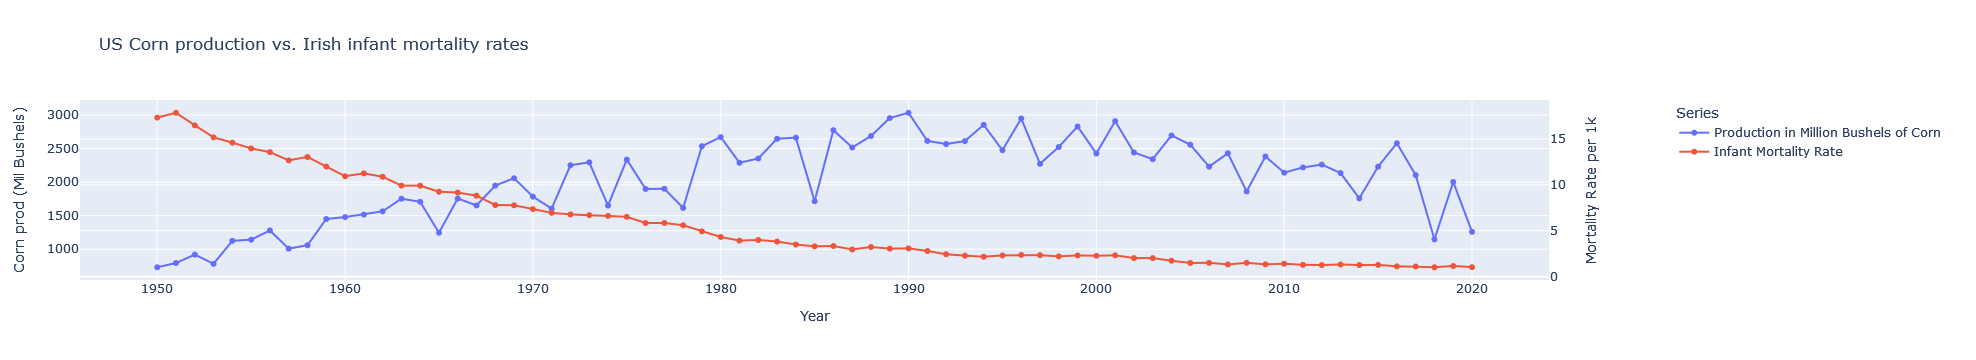

In [271]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(specs=[[{'secondary_y': True}]])


#Using infant_mort_grouped index as x axis
#This unfortunately cuts out corn data, but restrains the graphs to 
fig.add_trace(
    go.Scatter(x=infant_mort_grouped.index, y=corn['Mil_Bushels_Corn'], name = 'Production in Million Bushels of Corn', mode = 'lines+markers'),
    secondary_y = False
)

fig.add_trace(
    go.Scatter(x=infant_mort_grouped.index, y=infant_mort_grouped['total'], name = 'Infant Mortality Rate', mode = 'lines+markers'),
    secondary_y = True
)

fig.update_layout(
    title =  'US Corn production vs. Irish infant mortality rates',
    xaxis_title="Year",
    yaxis_title = 'Corn prod (Mil Bushels)',
    yaxis2=dict(title="Mortality Rate per 1k", overlaying="y", side="right"),
    legend_title="Series"
)

fig.show()

While it may be tempting to state that infant mortality in Ireland decreases because of increasing US corn production, we cannot make that conclusion.
There generally seems to be a negative correlation between the two variables of interest, but this does not necessarily mean causation.
Furthermore, infant mortality rate does not seem responsive to the large decreases in corn production, such as in 1985 or nearing 2020.